In [ ]:
!pip install torch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [2]:
# Create a Model class that inherits nn.Module
class Model(nn.Module):
  def __init__(self, in_features=4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()  # Initialize the parent class
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
# Pick a random seed
torch.manual_seed(41)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib  inline

In [5]:
data = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [6]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
print(data["variety"].value_counts())

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


In [8]:
data["variety"] = data["variety"].map({"Setosa":0.,"Versicolor":1,"Virginica":2})

In [9]:
# train test split set x,y and convert them into numpy array
x = data.drop("variety",axis=1).values
y = data["variety"].values

In [10]:
# Spliting data into train and test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [11]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [12]:
# convert y features to long tensor
y_train  = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# checking dimension of each split
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

torch.Size([120, 4]) torch.Size([30, 4]) torch.Size([120]) torch.Size([30])


In [14]:
# set the criterion of model to measure error, how far off the prediction are from acutal result
criterion = nn.CrossEntropyLoss()
# Choose Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [16]:
# Train our Model
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)
  # Measure the loss/error, gonna be high at first
  loss  = criterion(y_pred,y_train) # predicted
  # Keep Track of Loss
  losses.append(loss.detach().numpy())
  # Every 10 epochs print epoch , loss
  if i % 10 == 00:
    print("Epochs : ", epochs, " loss : ",loss)

  # Do some backpropogation: take the error rate of forward progation and feed it backward to finetune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epochs :  100  loss :  tensor(1.1252, grad_fn=<NllLossBackward0>)
Epochs :  100  loss :  tensor(1.0097, grad_fn=<NllLossBackward0>)
Epochs :  100  loss :  tensor(0.8162, grad_fn=<NllLossBackward0>)
Epochs :  100  loss :  tensor(0.5860, grad_fn=<NllLossBackward0>)
Epochs :  100  loss :  tensor(0.4003, grad_fn=<NllLossBackward0>)
Epochs :  100  loss :  tensor(0.2679, grad_fn=<NllLossBackward0>)
Epochs :  100  loss :  tensor(0.1796, grad_fn=<NllLossBackward0>)
Epochs :  100  loss :  tensor(0.1217, grad_fn=<NllLossBackward0>)
Epochs :  100  loss :  tensor(0.0861, grad_fn=<NllLossBackward0>)
Epochs :  100  loss :  tensor(0.0652, grad_fn=<NllLossBackward0>)


Text(0.5, 0, 'Epochs')

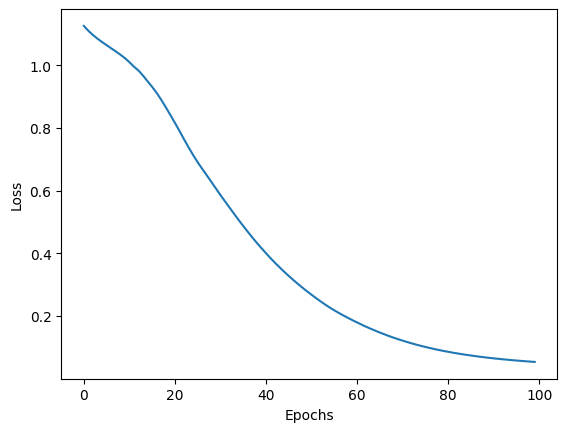

In [17]:
plt.plot(range(epochs),losses)
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [18]:
# Evaluate Model on Test Dataset-validate model on test dataset
with torch.no_grad():   # Basically turn off backpropogation
  y_eval = model.forward(X_test)  # dataset will be from Testing Sets
  loss = criterion(y_eval,y_test) # finding loss and error



In [19]:
loss

tensor(0.1315)

In [26]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    # Will tell us what type of flower class our network think it is
    print(f'{i+1:2}. {str(torch.argmax(y_val)):38} {y_test[i]}')

    if torch.argmax(y_val) == y_test[i]:
      correct +=1
print()
print("Number of corrected predicted is", correct)

 1. tensor(2)                              2
 2. tensor(2)                              2
 3. tensor(2)                              2
 4. tensor(1)                              1
 5. tensor(2)                              2
 6. tensor(1)                              1
 7. tensor(2)                              2
 8. tensor(1)                              1
 9. tensor(2)                              2
10. tensor(2)                              2
11. tensor(2)                              2
12. tensor(0)                              0
13. tensor(0)                              0
14. tensor(1)                              1
15. tensor(0)                              0
16. tensor(1)                              2
17. tensor(0)                              0
18. tensor(2)                              1
19. tensor(0)                              0
20. tensor(0)                              0
21. tensor(1)                              1
22. tensor(2)                              2
23. tensor

In [28]:
X_train[1]

tensor([6.5000, 2.8000, 4.6000, 1.5000])

In [29]:
# Save our Model
torch.save(model.state_dict(), "iris_model.pt")

In [30]:
# load the Model
new_model = Model()
new_model.load_state_dict(torch.load("iris_model.pt"))

<All keys matched successfully>

In [31]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)